El estudio consiste en la realización de ciertos cálculos y gráficos para analizar un determinado conjunto de activos financieros

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Instalación de dataprep

In [2]:
#------------------------------------------------------------------------------#
# INSTALACIÓN DE DATAPREP
# librería que realiza EDA automáticamente
#------------------------------------------------------------------------------#

In [3]:
!pip install dataprep

##Librerías

In [4]:
# Import de librerías a usar
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import create_report, plot, plot_correlation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Carga de datos

Cargamos el dataset correspondiente a precios de activos financieros.

In [5]:
# Carga de datos
df_prices = pd.read_csv('/content/drive/MyDrive/financial_assets_prices.csv')

In [6]:
df_prices

date    Asset1   Asset2     Asset3  Asset4  Asset5
0    2019-01-02  231.5061   55.875  25.649222  302.93   50.89
1    2019-01-03  231.0356   54.977  25.503047  302.11   50.41
2    2019-01-04  230.4026   56.129  26.147133  301.77   51.38
3    2019-01-07  230.0543   56.838  25.955277  302.33   52.14
4    2019-01-08  229.7012   56.895  26.137997  303.42   52.13
..          ...       ...      ...        ...     ...     ...
778  2021-12-27  249.9207  103.956  38.820000     NaN   70.11
779  2021-12-28  249.9368  104.526  39.115000     NaN   70.03
780  2021-12-29  248.7215  104.360  38.855000  342.46   69.81
781  2021-12-30  248.5485  104.663  38.985000  342.55   69.91
782  2021-12-31  248.7545  104.106  39.005000  342.59     NaN

[783 rows x 6 columns]

#EDA

In [7]:
# Realizo análisis exploratorio de datos usando Dataprep
# Esta librería genera un estudio con las características más importantes del dataset

In [8]:
report_prices = create_report(df_prices)

Computing series-max-agg-45944ad1c55f3443f476bb0020ce8781:   0%|          | 0/1078 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/dataprep/eda/distribution/render.py:274: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({col: [nrows - npresent]}, index=["Others"]))


DataPrep Report
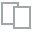
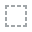
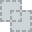
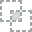
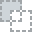
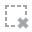
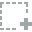
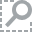
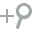
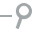
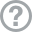
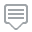
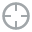
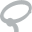
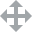
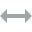
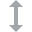
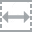
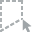
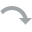
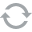
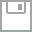
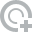
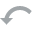
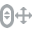
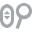
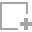
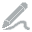
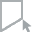
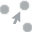
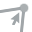
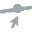

In [9]:
report_prices

Tenemos un 2.3% de valores nulos (NaN) en todo el dataset. El máximo se encuentra en Asset4, con un 6.26% de valores nulos. Se requeriría estudiar si hace falta eliminarlos o sustituirlos con las distintas técnicas para inputación de valores nulos. En Asset1, Asset2 y Asset3 tenemos 1.66% de valores nulos, y en Asset5 un 2.55%. Quizás para 1,2,3 sería menos necesario hacer una inputación pero conviene verlo.

No hay filas duplicadas.

En cuanto a outliers, se pueden observar en los BoxPlot, dentro del apartado Show Details de cada variable. Las variables que muestran outliers son Asset1 y Asset4.
- En Asset1, el boxplot muestra outliers inferiores. El percentil-5 es 232.8306 y el primer cuartil Q1 (percentil-25) se encuentra en 246.8681, mientras que el mínimo se encuentra en 229.7012. Esto indica que los outliers no están tan alejados del resto de valores así que lo más seguro es que sean valores plausibles. Además en la gráfica de frecuencias no muestra ningún valor inusual muy alejado del resto.
- En Asset4 ocurre algo parecido. Q1 = 318.765, percentil-5 = 303.982, mínimo = 272.79. Aunque en este caso hay más diferencia entre el mínimo y el perc-5, sigue pareciendo algo no muy anómalo. En la gráfica de frecuencias sí se observa más distinción entre la distribución de los valores más comunes y los outliers inferiores, pero no parece ser anómalo.

In [10]:
# Comparo media y mediana usando los distintos métodos de inputación de valores nulos con respecto al dataset original sin inputación
# En el caso de inputación de la media en valores faltantes, por definición la variación en la media será cero, ídem con la mediana
# Este método no es del todo significativo, en su lugar me guiaré por el análisis visual de las distribuciones
print('DATASET ORIGINAL')
print('')
print('Media')
print(df_prices.drop('date', axis=1).mean())
print('')
print('Mediana')
print(df_prices.drop('date', axis=1).median())

for input_method in ['ffill', 'bfill']:
  print('')
  print('')
  print('NaN INPUT METHOD:', input_method)
  print('')
  print('Media')
  print(df_prices.drop('date', axis=1).fillna(method=input_method).mean())
  print('')
  print('Mediana')
  print(df_prices.drop('date', axis=1).fillna(method=input_method).median())
  print('')
  print('Variación media (%)')
  print(abs(100*(df_prices.drop('date', axis=1).fillna(method=input_method).mean()-df_prices.drop('date', axis=1).mean())/df_prices.drop('date', axis=1).mean()))
  print('')
  print('Variación mediana (%)')
  print(abs(100*(df_prices.drop('date', axis=1).fillna(method=input_method).median()-df_prices.drop('date', axis=1).median())/df_prices.drop('date', axis=1).median()))

print('')
print('')
print('NaN INPUT METHOD: MEAN')
print('')
print('Media')
print(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).mean()).mean())
print('')
print('Mediana')
print(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).mean()).median())
print('')
print('Variación media (%)')
print(abs(100*(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).mean()).mean()-df_prices.drop('date', axis=1).mean())/df_prices.drop('date', axis=1).mean()))
print('')
print('Variación mediana (%)')
print(abs(100*(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).mean()).median()-df_prices.drop('date', axis=1).median())/df_prices.drop('date', axis=1).median()))
print('')
print('')
print('NaN INPUT METHOD: MEDIAN')
print('')
print('Media')
print(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).median()).mean())
print('')
print('Mediana')
print(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).median()).median())
print('')
print('Variación media (%)')
print(abs(100*(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).median()).mean()-df_prices.drop('date', axis=1).mean())/df_prices.drop('date', axis=1).mean()))
print('')
print('Variación mediana (%)')
print(abs(100*(df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).median()).median()-df_prices.drop('date', axis=1).median())/df_prices.drop('date', axis=1).median()))
print('')
print('')
print('ELIMINACIÓN NaN')
print('')
print('Media')
print(df_prices.drop('date', axis=1).dropna().mean())
print('')
print('Mediana')
print(df_prices.drop('date', axis=1).dropna().median())
print('')
print('Variación media (%)')
print(abs(100*(df_prices.drop('date', axis=1).dropna().mean()-df_prices.drop('date', axis=1).mean())/df_prices.drop('date', axis=1).mean()))
print('')
print('Variación mediana (%)')
print(abs(100*(df_prices.drop('date', axis=1).dropna().median()-df_prices.drop('date', axis=1).median())/df_prices.drop('date', axis=1).median()))

DATASET ORIGINAL

Media
Asset1    248.980188
Asset2     76.112381
Asset3     31.473296
Asset4    327.356880
Asset5     54.123198
dtype: float64

Mediana
Asset1    250.685350
Asset2     72.003000
Asset3     30.651198
Asset4    326.665000
Asset5     52.720000
dtype: float64


NaN INPUT METHOD: ffill

Media
Asset1    248.943378
Asset2     76.035515
Asset3     31.459244
Asset4    327.342337
Asset5     54.101603
dtype: float64

Mediana
Asset1    250.624000
Asset2     71.908000
Asset3     30.646371
Asset4    326.700000
Asset5     52.730000
dtype: float64

Variación media (%)
Asset1    0.014784
Asset2    0.100990
Asset3    0.044649
Asset4    0.004443
Asset5    0.039900
dtype: float64

Variación mediana (%)
Asset1    0.024473
Asset2    0.131939
Asset3    0.015749
Asset4    0.010714
Asset5    0.018968
dtype: float64


NaN INPUT METHOD: bfill

Media
Asset1    248.939463
Asset2     76.041204
Asset3     31.460812
Asset4    327.362976
Asset5     54.084955
dtype: float64

Mediana
Asset1    250.62400

In [11]:
# En general las variaciones son todas inferiores al 0.1%

In [12]:
# Realizo varios gráficos comparando distintos métodos de inputación con la distribución original

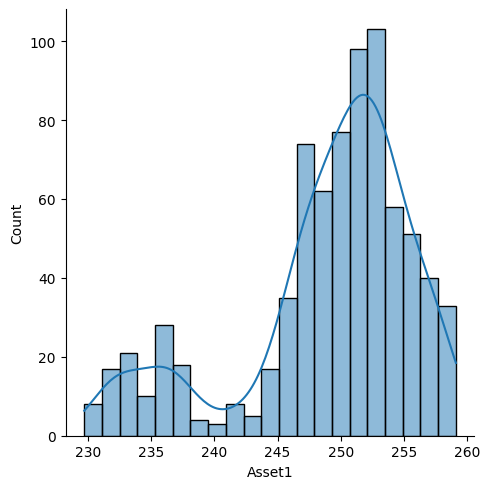

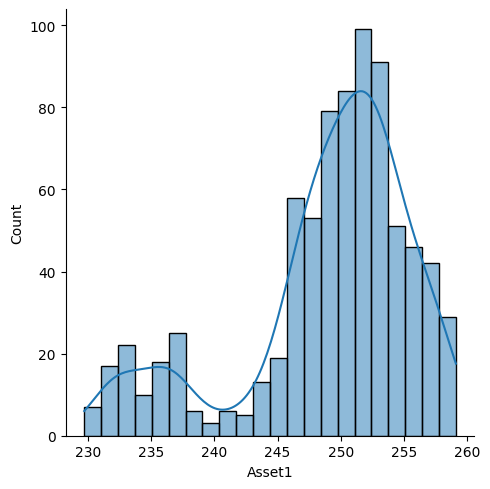

In [13]:
sns.displot(data=df_prices, x='Asset1', kde=True);
sns.displot(data=df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).mean()), x='Asset1', kde=True);

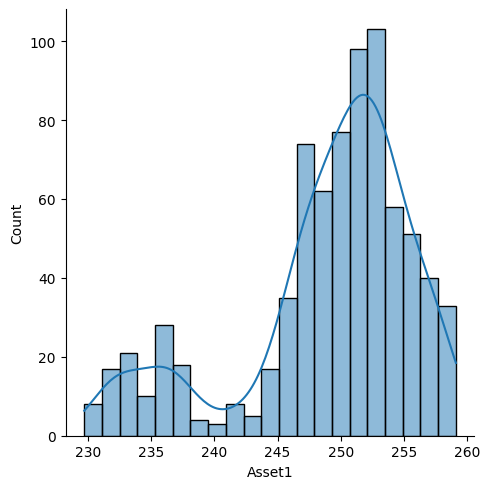

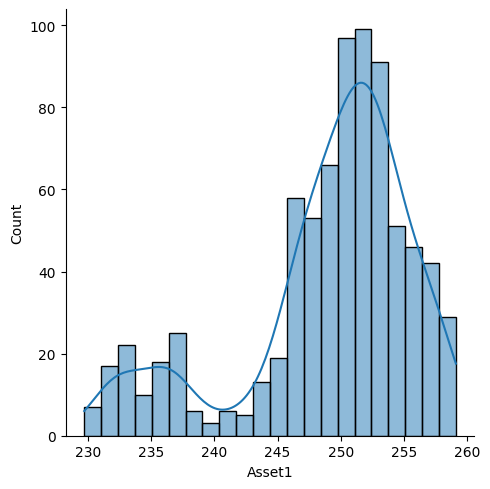

In [14]:
sns.displot(data=df_prices, x='Asset1', kde=True);
sns.displot(data=df_prices.drop('date', axis=1).fillna(df_prices.drop('date', axis=1).median()), x='Asset1', kde=True);

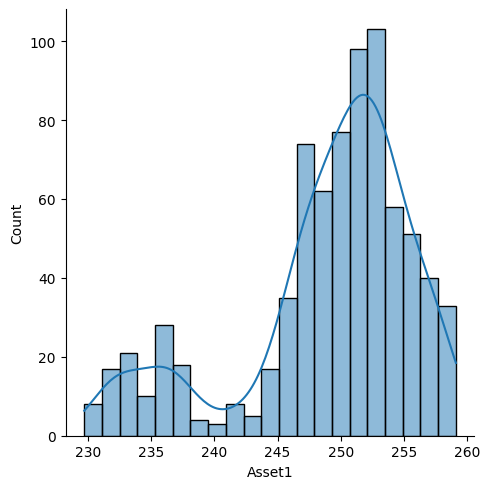

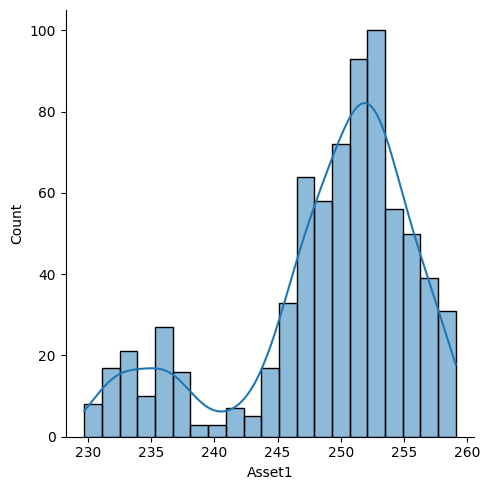

In [15]:
sns.displot(data=df_prices, x='Asset1', kde=True);
sns.displot(data=df_prices.drop('date', axis=1).dropna(), x='Asset1', kde=True);

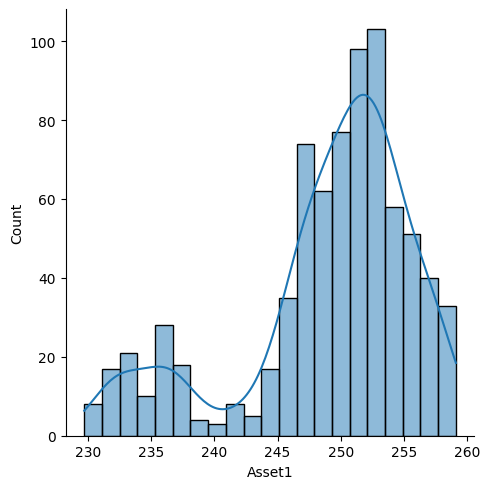

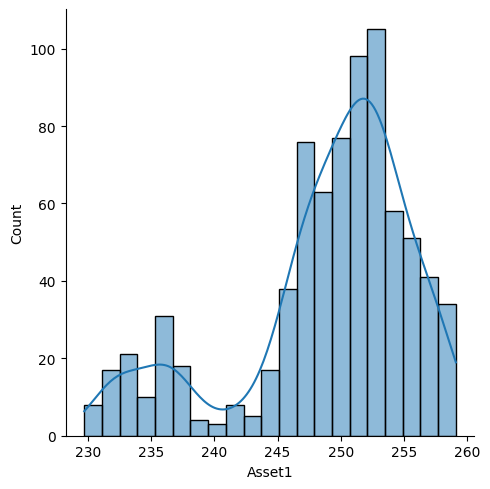

In [16]:
sns.displot(data=df_prices, x='Asset1', kde=True);
sns.displot(data=df_prices.drop('date', axis=1).fillna(method='ffill'), x='Asset1', kde=True);

In [17]:
# Ningún método arroja distribuciones excesivamente distintas a la original
# Escojo el método ffill

In [18]:
df_prices_clean = df_prices.fillna(method='ffill')

In [19]:
# Paso la columna date a variable temporal por si no lo estuviera
df_prices_clean['date'] = pd.to_datetime(df_prices_clean['date'])

In [20]:
df_prices_clean

date    Asset1   Asset2     Asset3  Asset4  Asset5
0   2019-01-02  231.5061   55.875  25.649222  302.93   50.89
1   2019-01-03  231.0356   54.977  25.503047  302.11   50.41
2   2019-01-04  230.4026   56.129  26.147133  301.77   51.38
3   2019-01-07  230.0543   56.838  25.955277  302.33   52.14
4   2019-01-08  229.7012   56.895  26.137997  303.42   52.13
..         ...       ...      ...        ...     ...     ...
778 2021-12-27  249.9207  103.956  38.820000  342.40   70.11
779 2021-12-28  249.9368  104.526  39.115000  342.40   70.03
780 2021-12-29  248.7215  104.360  38.855000  342.46   69.81
781 2021-12-30  248.5485  104.663  38.985000  342.55   69.91
782 2021-12-31  248.7545  104.106  39.005000  342.59   69.91

[783 rows x 6 columns]

#Gráfico series temporales para comparar evolución

In [21]:
# Hay que normalizar el dataset a un mismo valor inicial para poder hacer una comparación de las series temporales
# Copio en un nuevo dataset para conservar el original
df_prices_clean_norm = df_prices_clean.copy()

# Se normalizan las series para que empiecen en el mismo valor, que será en este caso la unidad
for column in df_prices_clean_norm.columns[1:]:
    df_prices_clean_norm[column] = df_prices_clean_norm[column] / df_prices_clean_norm[column].iloc[0]

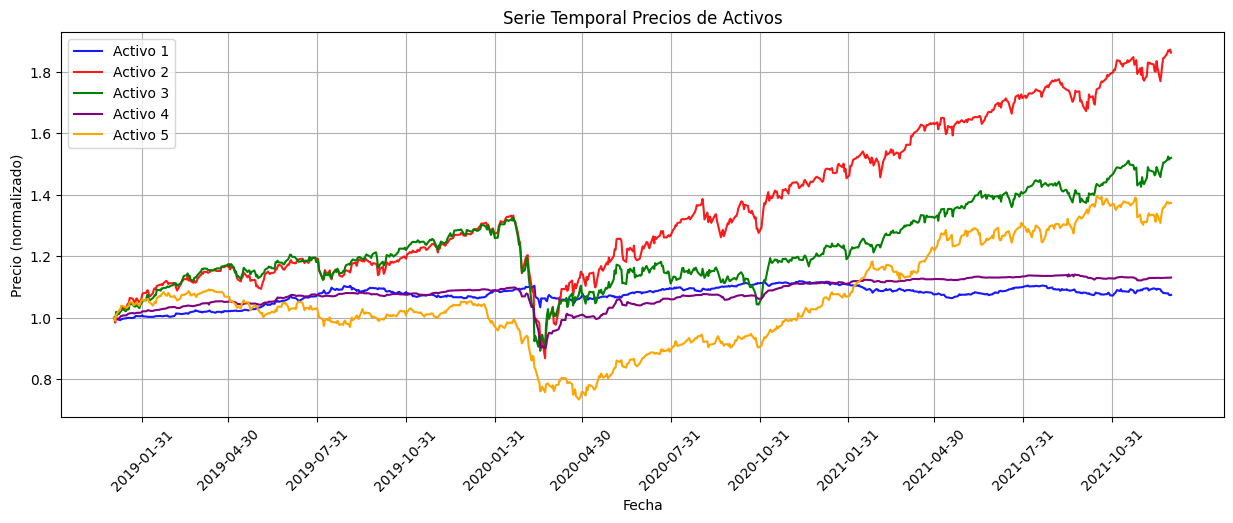

In [22]:
plt.figure(figsize=(15, 5))
plt.plot(df_prices_clean_norm.date, df_prices_clean_norm.Asset1, label='Activo 1', color='b', alpha=0.9)
plt.plot(df_prices_clean_norm.date, df_prices_clean_norm.Asset2, label='Activo 2', color='r', alpha=0.9)
plt.plot(df_prices_clean_norm.date, df_prices_clean_norm.Asset3, label='Activo 3', color='g')
plt.plot(df_prices_clean_norm.date, df_prices_clean_norm.Asset4, label='Activo 4', color='purple')
plt.plot(df_prices_clean_norm.date, df_prices_clean_norm.Asset5, label='Activo 5', color='orange')

# Elaboro etiquetas más amplias para xticks, para no saturar el eje
date_ticks = pd.date_range(start=df_prices_clean_norm['date'].min(), end=df_prices_clean_norm['date'].max(), freq='3M')  # Etiquetas trimestrales
plt.xticks(date_ticks, rotation=45)

plt.title('Serie Temporal Precios de Activos')
plt.xlabel('Fecha')
plt.ylabel('Precio (normalizado)')
plt.legend()

plt.grid(True)
plt.show()

#Rendimientos diarios porcentuales. Correlación

Calculamos los rendimientos diarios porcentuales de cada activo y estudiamos las correlaciones.

In [23]:
df_prices_clean

date    Asset1   Asset2     Asset3  Asset4  Asset5
0   2019-01-02  231.5061   55.875  25.649222  302.93   50.89
1   2019-01-03  231.0356   54.977  25.503047  302.11   50.41
2   2019-01-04  230.4026   56.129  26.147133  301.77   51.38
3   2019-01-07  230.0543   56.838  25.955277  302.33   52.14
4   2019-01-08  229.7012   56.895  26.137997  303.42   52.13
..         ...       ...      ...        ...     ...     ...
778 2021-12-27  249.9207  103.956  38.820000  342.40   70.11
779 2021-12-28  249.9368  104.526  39.115000  342.40   70.03
780 2021-12-29  248.7215  104.360  38.855000  342.46   69.81
781 2021-12-30  248.5485  104.663  38.985000  342.55   69.91
782 2021-12-31  248.7545  104.106  39.005000  342.59   69.91

[783 rows x 6 columns]

In [24]:
# Cálculo de rendimientos diarios.

df_returns = df_prices_clean[['date', 'Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']]

# Se establece 'date' como índice
df_returns.set_index('date', inplace=True)

# Se usa la función de pandas pct_change() que calcula el cambio porcentual entre dos instancias
daily_returns = df_returns.pct_change()

In [25]:
daily_returns

Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-02       NaN       NaN       NaN       NaN       NaN
2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432
2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242
2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792
2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192
...              ...       ...       ...       ...       ...
2021-12-27 -0.000913  0.007384  0.005439  0.000000  0.013443
2021-12-28  0.000064  0.005483  0.007599  0.000000 -0.001141
2021-12-29 -0.004862 -0.001588 -0.006647  0.000175 -0.003142
2021-12-30 -0.000696  0.002903  0.003346  0.000263  0.001432
2021-12-31  0.000829 -0.005322  0.000513  0.000117  0.000000

[783 rows x 5 columns]

In [26]:
# Elimino la primera fila de NaN para facilitar cálculos
daily_returns = daily_returns.iloc[1:]
daily_returns

Asset1    Asset2    Asset3    Asset4    Asset5
date                                                        
2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432
2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242
2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792
2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192
2019-01-09  0.001976  0.012919  0.002272  0.004120  0.014003
...              ...       ...       ...       ...       ...
2021-12-27 -0.000913  0.007384  0.005439  0.000000  0.013443
2021-12-28  0.000064  0.005483  0.007599  0.000000 -0.001141
2021-12-29 -0.004862 -0.001588 -0.006647  0.000175 -0.003142
2021-12-30 -0.000696  0.002903  0.003346  0.000263  0.001432
2021-12-31  0.000829 -0.005322  0.000513  0.000117  0.000000

[782 rows x 5 columns]

In [27]:
# Cálculo de la matriz de correlaciones.

def grafica_correlacion(data):

    data_a_dibujar=data

    if len(data_a_dibujar)==0:
      print('No existen datos')

    else:
        # Se obtiene la matriz de correlación general
        corr_matrix = data_a_dibujar.corr()

        # Creo una máscara para eliminar la matriz triangular superior y quedarme solo con diagonal y triangular inferior
        # ya que la matriz de correlación es simétrica y la triangular superior es información redundante
        # Realmente la diagonal no es necesaria ya que todos sus elementos son la unidad por ser la correlación entre
        # una variable y ella misma, pero la dejo con fin estético y de guía visual
        mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
        corr_matrix = corr_matrix.mask(mask)

        # Tamaño de la gráfica
        fig, ax = plt.subplots(figsize=(10, 10))

        # Se grafica la matriz de correlación obtenida
        sns.heatmap(corr_matrix, vmin=-1, vmax=1, annot=True,
                    square=True,
                    linewidths=0.5,
                    cmap='coolwarm',
                    cbar_kws={'shrink': 0.4, 'ticks': [-1, -0.5, 0, 0.5, 1]},
                    annot_kws={'size': 12}, ax=ax).set(title='Correlation matrix')

        ax.grid(False)

        plt.show()

        # Obtengo las parejas de variables ordenadas de 1 a -1
        correlation_pairs = corr_matrix.unstack().sort_values(ascending=False)
        top_correlation_pairs = correlation_pairs[correlation_pairs < 1]


    print('')
    print('Parejas de variables con correlación ordenada de 1 a -1:')
    print('')
    print(round(top_correlation_pairs, 4))

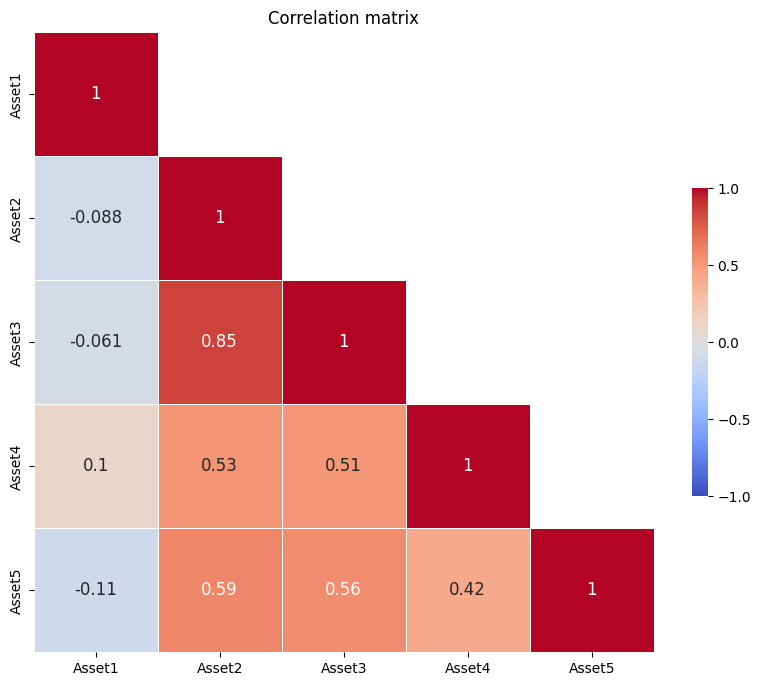


Parejas de variables con correlación ordenada de 1 a -1:

Asset2  Asset3    0.8525
        Asset5    0.5914
Asset3  Asset5    0.5574
Asset2  Asset4    0.5266
Asset3  Asset4    0.5115
Asset4  Asset5    0.4212
Asset1  Asset4    0.1023
        Asset3   -0.0613
        Asset2   -0.0883
        Asset5   -0.1065
dtype: float64


In [28]:
grafica_correlacion(data=daily_returns)

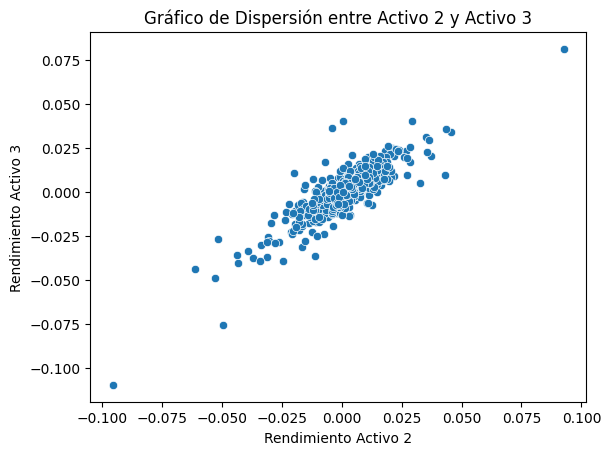

In [29]:
# Gráfico de dispersión entre los rendimientos de 2 activos.

sns.scatterplot(x='Asset2', y='Asset3', data=daily_returns)

plt.title('Gráfico de Dispersión entre Activo 2 y Activo 3')
plt.xlabel('Rendimiento Activo 2')
plt.ylabel('Rendimiento Activo 3')

plt.show()

In [30]:
# Se observa una cierta tendencia lineal entre ambas variables
# Esto pone de manifiesto la correlación obtenida para ambos activos de 0.8525
# Podría incluso realizarse una regresión lineal para obtener una aproximación a la dependencia

X = np.array(daily_returns.Asset2).reshape(-1, 1)
y = np.array(daily_returns.Asset3)

In [31]:
model = LinearRegression()

In [32]:
model.fit(X, y)

LinearRegression()

In [33]:
y_pred = model.predict(X)

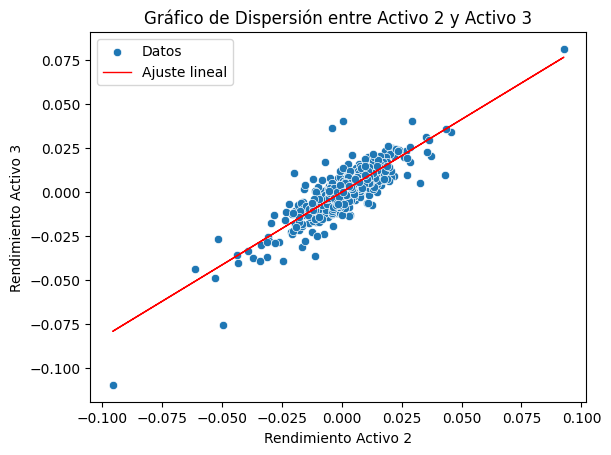

In [34]:
sns.scatterplot(x='Asset2', y='Asset3', data=daily_returns, label='Datos')
plt.plot(daily_returns.Asset2, y_pred, color='red', linewidth=1, label='Ajuste lineal')

plt.title('Gráfico de Dispersión entre Activo 2 y Activo 3')
plt.xlabel('Rendimiento Activo 2')
plt.ylabel('Rendimiento Activo 3')
plt.legend()

plt.show()

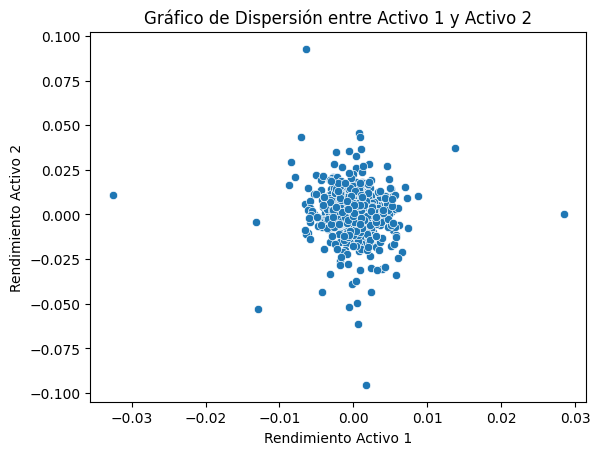

In [35]:
# Así mismo, Asset1 y Asset2 no deberían mostrar una dependencia lineal

sns.scatterplot(x='Asset1', y='Asset2', data=daily_returns)

plt.title('Gráfico de Dispersión entre Activo 1 y Activo 2')
plt.xlabel('Rendimiento Activo 1')
plt.ylabel('Rendimiento Activo 2')

plt.show()

#Análisis de la cartera

##Gráficos sobre los pesos de los activos

In [36]:
# Cargamos el fichero con los pesos que tiene cada uno de los activos en cada uno de los días.
df_weights = pd.read_csv('/content/drive/MyDrive/portfolio_weights.csv')

In [37]:
df_weights.isna().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [38]:
df_weights.duplicated().sum()

0

In [39]:
# No tiene valores faltantes ni repetidos

In [40]:
df_weights['date'] = pd.to_datetime(df_weights['date'])

In [41]:
# Cada número representa la proporción del capital total invertida en el correspondiente activo (si sumas los de todos los activos sale la unidad)
df_weights

date    Asset1    Asset2    Asset3   Asset4    Asset5
0   2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974
1   2019-01-03  0.225458  0.116255  0.265003  0.23031  0.162974
2   2019-01-04  0.225458  0.116255  0.265003  0.23031  0.162974
3   2019-01-07  0.225458  0.116255  0.265003  0.23031  0.162974
4   2019-01-08  0.225458  0.116255  0.265003  0.23031  0.162974
..         ...       ...       ...       ...      ...       ...
778 2021-12-27  0.071307  0.266093  0.168775  0.33547  0.158356
779 2021-12-28  0.071307  0.266093  0.168775  0.33547  0.158356
780 2021-12-29  0.071307  0.266093  0.168775  0.33547  0.158356
781 2021-12-30  0.071307  0.266093  0.168775  0.33547  0.158356
782 2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356

[783 rows x 6 columns]

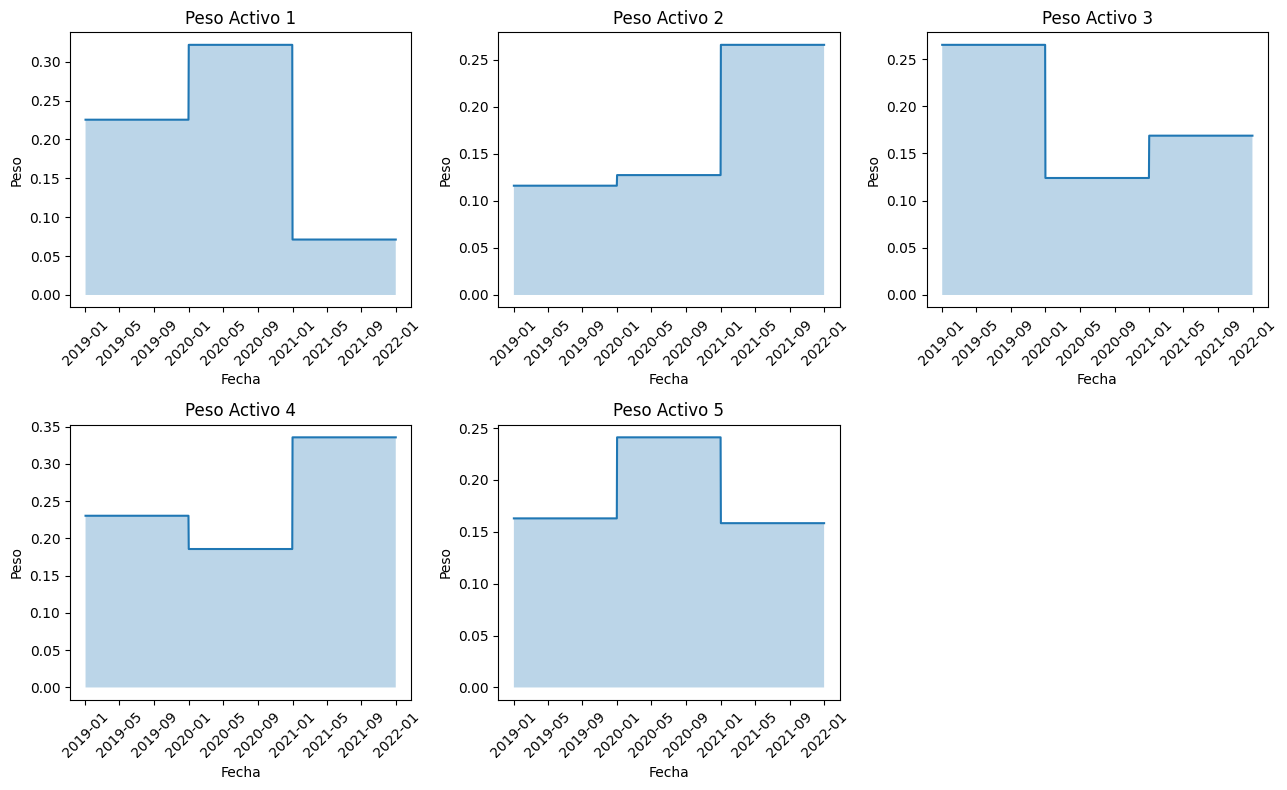

In [42]:
# Aquí veo la distribución que tienen los pesos

variables = df_weights.drop('date', axis=1).columns

# Calcula el número de filas y columnas necesarias para acomodar las variables
num_variables = len(variables)
num_rows = (num_variables - 1) // 3 + 1
num_cols = min(num_variables, 3)

# Configura el tamaño de la figura y la cuadrícula
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(13, 8))

# Itera sobre las variables y crea los gráficos de densidad de kernel en la cuadrícula
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.lineplot(data=df_weights, x='date', y=variable, ax=ax)
    ax.set_title(f'Peso Activo {i+1}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Peso')
    ax.fill_between(df_weights['date'], 0, df_weights[variable], alpha=0.3)

    # Rota las etiquetas del eje x en 45 grados
    ax.tick_params(axis='x', rotation=45)

# Elimina cualquier subplot vacío
for i in range(num_variables, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

# Ajusta el espacio entre subplots
plt.tight_layout()

# Muestra la figura con los gráficos en casillas
plt.show()

In [43]:
# Lo que se observa en esta gráfica es que cada año se le asigna un peso a cada activo,
# entonces convendría hacer las gráficas separando en años: 2019, 2020 y 2021.

In [44]:
# Primero compruebo que efectivamente ese cambio se produce el primer día de cada año

In [45]:
print('· Primer día de 2019')
print('')
print(df_weights.head(1))
print('')
print('')
print('· Cambio de pesos de 2019 a 2020')
print('')
print(df_weights[df_weights.date < '2020-01-01'].tail(1))
print(df_weights[df_weights.date >= '2020-01-01'].head(1))
print('')
print('')
print('· Cambio de pesos de 2020 a 2021')
print('')
print(df_weights[df_weights.date < '2021-01-01'].tail(1))
print(df_weights[df_weights.date >= '2021-01-01'].head(1))
print('')
print('')
print('· Último día de 2021')
print('')
print(df_weights.tail(1))

· Primer día de 2019

        date    Asset1    Asset2    Asset3   Asset4    Asset5
0 2019-01-02  0.225458  0.116255  0.265003  0.23031  0.162974


· Cambio de pesos de 2019 a 2020

          date    Asset1    Asset2    Asset3   Asset4    Asset5
259 2019-12-31  0.225458  0.116255  0.265003  0.23031  0.162974
          date    Asset1    Asset2    Asset3    Asset4    Asset5
260 2020-01-01  0.321749  0.127529  0.123941  0.185697  0.241084


· Cambio de pesos de 2020 a 2021

          date    Asset1    Asset2    Asset3    Asset4    Asset5
521 2020-12-31  0.321749  0.127529  0.123941  0.185697  0.241084
          date    Asset1    Asset2    Asset3   Asset4    Asset5
522 2021-01-01  0.071307  0.266093  0.168775  0.33547  0.158356


· Último día de 2021

          date    Asset1    Asset2    Asset3   Asset4    Asset5
782 2021-12-31  0.071307  0.266093  0.168775  0.33547  0.158356


In [46]:
weights_resume = {
                'year' : [2019, 2020, 2021],
                'Asset1' : [df_weights.Asset1.unique()[0], df_weights.Asset1.unique()[1], df_weights.Asset1.unique()[2]],
                'Asset2' : [df_weights.Asset2.unique()[0], df_weights.Asset2.unique()[1], df_weights.Asset2.unique()[2]],
                'Asset3' : [df_weights.Asset3.unique()[0], df_weights.Asset3.unique()[1], df_weights.Asset3.unique()[2]],
                'Asset4' : [df_weights.Asset4.unique()[0], df_weights.Asset4.unique()[1], df_weights.Asset4.unique()[2]],
                'Asset5' : [df_weights.Asset5.unique()[0], df_weights.Asset5.unique()[1], df_weights.Asset5.unique()[2]],
}

df_w_resume = pd.DataFrame(weights_resume)
df_w_resume

year    Asset1    Asset2    Asset3    Asset4    Asset5
0  2019  0.225458  0.116255  0.265003  0.230310  0.162974
1  2020  0.321749  0.127529  0.123941  0.185697  0.241084
2  2021  0.071307  0.266093  0.168775  0.335470  0.158356

In [47]:
# A continuación elaboro varios tipos de gráficas

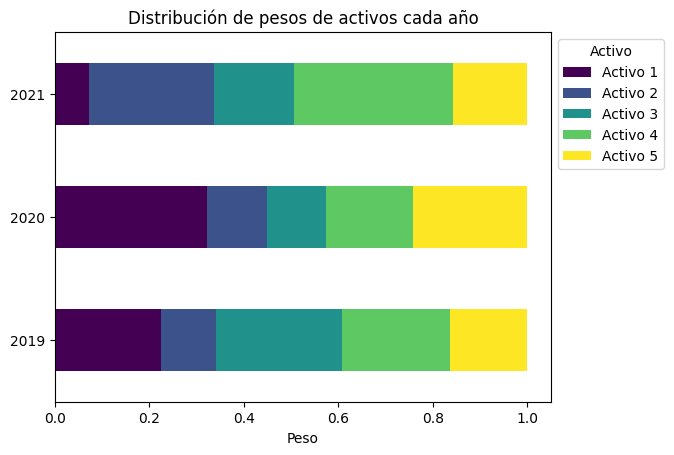

In [48]:
# Gráfico de barras apiladas que da información de qué porción del capital total se le da a cada activo en cada año

df_w_resume.set_index('year').plot(kind='barh', stacked=True, colormap='viridis')

plt.title('Distribución de pesos de activos cada año')
plt.xlabel('Peso')
plt.ylabel('')
plt.legend(title='Activo', bbox_to_anchor=(1,1), labels=['Activo 1', 'Activo 2', 'Activo 3', 'Activo 4', 'Activo 5'])


plt.show()

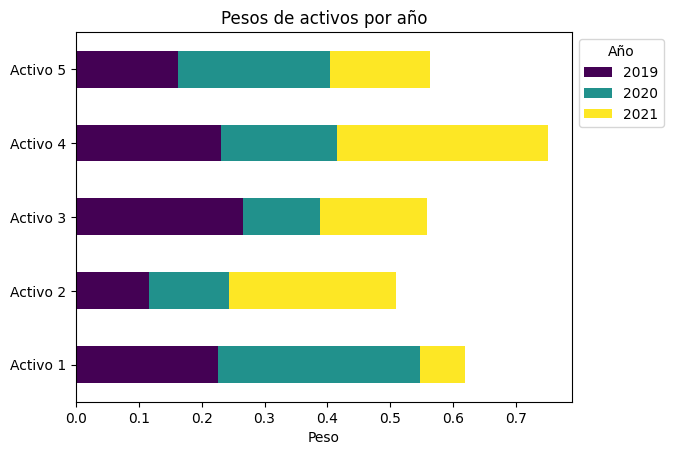

In [49]:
# Gráfica que informa del peso que tiene cada activo en cada año

df_w_resume.set_index('year').T.plot(kind='barh', stacked=True, colormap='viridis')

plt.title('Pesos de activos por año')
plt.xlabel('Peso')
plt.legend(title='Año', bbox_to_anchor=(1,1))

plt.yticks(range(5), ['Activo 1', 'Activo 2', 'Activo 3', 'Activo 4', 'Activo 5'])


plt.show()

<Figure size 1000x600 with 0 Axes>

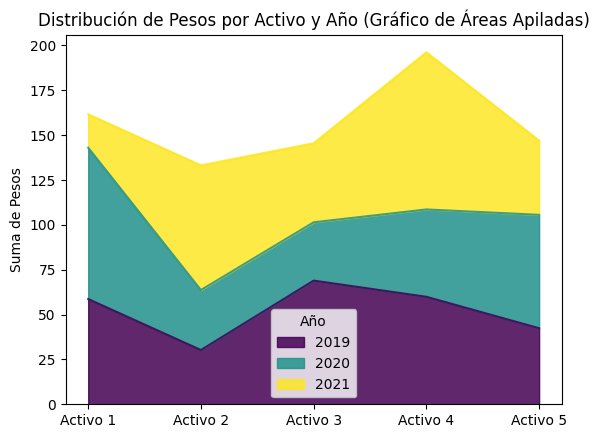

In [50]:
# Gráfica de áreas apiladas de la suma de los pesos en cada activo separando en años

df_weights['year'] = df_weights['date'].dt.year
grouped_weights = df_weights.groupby('year')[['Asset1', 'Asset2', 'Asset3', 'Asset4', 'Asset5']].sum()

plt.figure(figsize=(10, 6))

grouped_weights.T.plot(kind='area', stacked=True, colormap='viridis', alpha=0.85)

plt.title('Distribución de Pesos por Activo y Año (Gráfico de Áreas Apiladas)')
plt.ylabel('Suma de Pesos')
plt.legend(title='Año')
plt.xticks(range(5), ['Activo 1', 'Activo 2', 'Activo 3', 'Activo 4', 'Activo 5'])

plt.show()

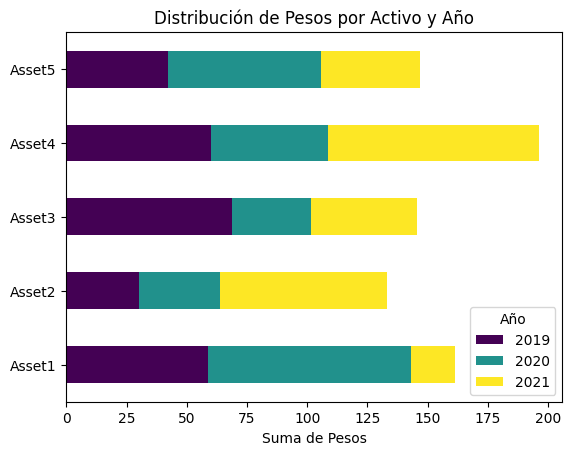

In [51]:
# Barras apiladas de la suma de los pesos que tiene cada activo en cada año

grouped_weights.T.plot(kind='barh', stacked=True, colormap='viridis')

plt.title('Distribución de Pesos por Activo y Año')
plt.xlabel('Suma de Pesos')
plt.legend(title='Año')

plt.show()

##Rentabilidad histórica acumulada de la cartera

In [52]:
daily_returns['sum'] = daily_returns['Asset1'] + daily_returns['Asset2'] + daily_returns['Asset3'] + daily_returns['Asset4'] + daily_returns['Asset5']

<ipython-input-52-7fdff5e093d7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns['sum'] = daily_returns['Asset1'] + daily_returns['Asset2'] + daily_returns['Asset3'] + daily_returns['Asset4'] + daily_returns['Asset5']


In [53]:
daily_returns.reset_index(inplace=True)

In [54]:
daily_returns

date    Asset1    Asset2    Asset3    Asset4    Asset5       sum
0   2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432 -0.035942
1   2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242  0.061586
2   2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792  0.020430
3   2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192  0.009921
4   2019-01-09  0.001976  0.012919  0.002272  0.004120  0.014003  0.035289
..         ...       ...       ...       ...       ...       ...       ...
777 2021-12-27 -0.000913  0.007384  0.005439  0.000000  0.013443  0.025353
778 2021-12-28  0.000064  0.005483  0.007599  0.000000 -0.001141  0.012006
779 2021-12-29 -0.004862 -0.001588 -0.006647  0.000175 -0.003142 -0.016064
780 2021-12-30 -0.000696  0.002903  0.003346  0.000263  0.001432  0.007249
781 2021-12-31  0.000829 -0.005322  0.000513  0.000117  0.000000 -0.003863

[782 rows x 7 columns]

In [55]:
daily_returns['date'] = pd.to_datetime(daily_returns['date'])

<ipython-input-55-9c02d288db3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_returns['date'] = pd.to_datetime(daily_returns['date'])


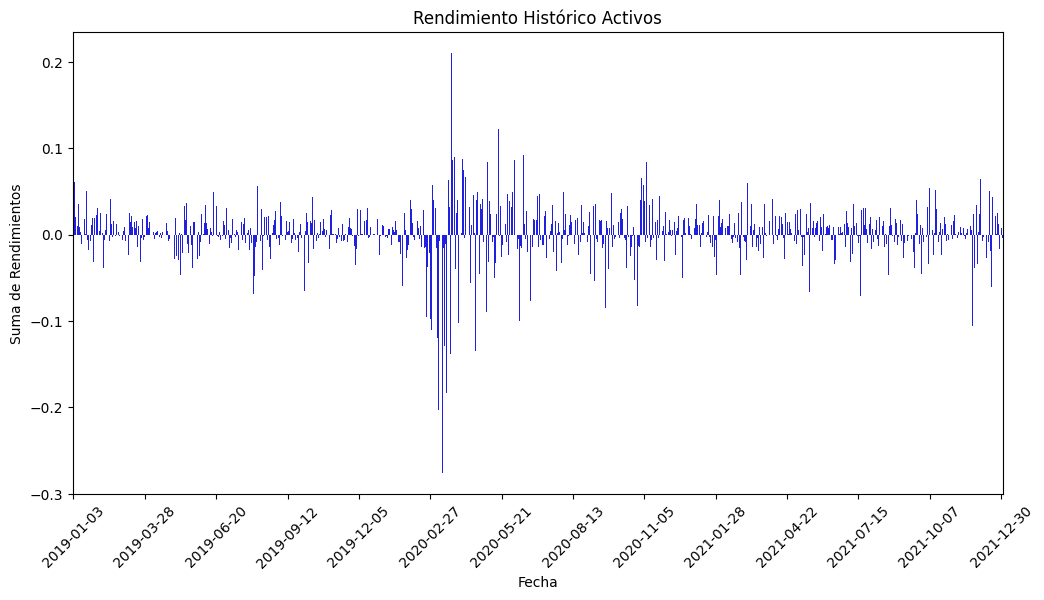

In [56]:
plt.figure(figsize=(12, 6))

# Grafico el rendimiento histórico con barras
ax = sns.barplot(data=daily_returns, x='date', y='sum', color='blue')

# Se cambia el formato que se muestra en el eje X. Esto se hace porque mostraba horas, minutos y segundos
plt.gca().set_xticklabels([date_text.get_text().split("T")[0] for date_text in plt.gca().get_xticklabels()])

# Divido el eje X en 15 ticks para que no se sature
num_ticks = 15
xticks_location = plt.MaxNLocator(num_ticks)
ax.xaxis.set_major_locator(xticks_location)
plt.xticks(rotation=45)

plt.title('Rendimiento Histórico Activos')
plt.xlabel('Fecha')
plt.ylabel('Suma de Rendimientos')

plt.show()

####Rentabilidad anualizada de la cartera.

In [57]:
daily_returns

date    Asset1    Asset2    Asset3    Asset4    Asset5       sum
0   2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432 -0.035942
1   2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242  0.061586
2   2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792  0.020430
3   2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192  0.009921
4   2019-01-09  0.001976  0.012919  0.002272  0.004120  0.014003  0.035289
..         ...       ...       ...       ...       ...       ...       ...
777 2021-12-27 -0.000913  0.007384  0.005439  0.000000  0.013443  0.025353
778 2021-12-28  0.000064  0.005483  0.007599  0.000000 -0.001141  0.012006
779 2021-12-29 -0.004862 -0.001588 -0.006647  0.000175 -0.003142 -0.016064
780 2021-12-30 -0.000696  0.002903  0.003346  0.000263  0.001432  0.007249
781 2021-12-31  0.000829 -0.005322  0.000513  0.000117  0.000000 -0.003863

[782 rows x 7 columns]

In [58]:
df_prices.date = pd.to_datetime(df_prices.date)
df_weights.date = pd.to_datetime(df_weights.date)

In [59]:
# Rentabilidad anualizada.

# Rendimientos diarios ponderados de la cartera
pond_daily_returns = (daily_returns.drop('date', axis=1) * df_weights.drop('date', axis=1)).sum(axis=1)

# Rendimientos anuales ponderados de la cartera
annual_returns = pond_daily_returns.groupby(df_prices['date'].dt.year).sum()

# Rentabilidad anualizada: media geométrica
# (https://www.ing.es/ennaranja/invertir-dinero/conceptos-utiles/que-es-la-rentabilidad-anualizada-y-como-se-aplica-para-calcular-el-resultado-de-tu-inversion/)
annualized_returns = annual_returns.sum()**(1/3)

print('Rentabilidad anualizada =', round(annualized_returns, 5), '%')

Rentabilidad anualizada = 0.69602 %


##Volatilidad anualizada de la cartera

Según la bibliografía, se puede calcular la volatilidad anualizada como la volatilidad diaria multiplicada por la raíz del factor de anualización

https://estrategiastrading.com/calcular-volatilidad/

https://www.estrategiasdeinversion.com/herramientas/diccionario/trading/volatilidad-anualizada-t-1225

Según la última web, deberíamos obtener las desviaciones estándar de los rendimientos diarios y multiplicarla por la raíz de 261. Se tendría que obtener un resultado para cada año. Aunque en el siguiente link se menciona que "Independientemente del intervalo temporal con el que se calcule, la volatilidad se suele presentar anualizada, para poder compararla más fácilmente." (https://www.rankia.com/blog/tomas-garcia/4390241-volatilidad-i-que), así que según esto puedo coger la total y multiplicarla por el factor en vez de separar por años. He obtenido un valor para cada activo en total.

In [60]:
daily_returns

date    Asset1    Asset2    Asset3    Asset4    Asset5       sum
0   2019-01-03 -0.002032 -0.016072 -0.005699 -0.002707 -0.009432 -0.035942
1   2019-01-04 -0.002740  0.020954  0.025255 -0.001125  0.019242  0.061586
2   2019-01-07 -0.001512  0.012632 -0.007338  0.001856  0.014792  0.020430
3   2019-01-08 -0.001535  0.001003  0.007040  0.003605 -0.000192  0.009921
4   2019-01-09  0.001976  0.012919  0.002272  0.004120  0.014003  0.035289
..         ...       ...       ...       ...       ...       ...       ...
777 2021-12-27 -0.000913  0.007384  0.005439  0.000000  0.013443  0.025353
778 2021-12-28  0.000064  0.005483  0.007599  0.000000 -0.001141  0.012006
779 2021-12-29 -0.004862 -0.001588 -0.006647  0.000175 -0.003142 -0.016064
780 2021-12-30 -0.000696  0.002903  0.003346  0.000263  0.001432  0.007249
781 2021-12-31  0.000829 -0.005322  0.000513  0.000117  0.000000 -0.003863

[782 rows x 7 columns]

In [61]:
# Calculo la volatilidad anualizada de cada activo como la desviación estándar de los rendimientos diarios multiplicada por el factor de anualización
# Considero el factor de anualización de 261 días
daily_returns.drop('date', axis=1).std()*(np.sqrt(261))

Asset1    0.048304
Asset2    0.193938
Asset3    0.188591
Asset4    0.053642
Asset5    0.152430
sum       0.505354
dtype: float64